### Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Load Dataset

In [11]:
df = pd.read_csv('../data/gold_price_data.csv')
print(df.head())

         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [12]:
# แปลงเป็น datetime และเรียงลำดับ
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)
df = df.set_index('date')

In [13]:
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


### Summary

In [16]:
summary = {
    "rows": len(df),
    "date_min": df.index.min().date().isoformat(),
    "date_max": df.index.max().date().isoformat(),
    "close_min": float(df['close'].min()),
    "close_max": float(df['close'].max()),
    "adj_close_min": float(df['adj_close'].min()),
    "adj_close_max": float(df['adj_close'].max())
}

summary


{'rows': 5215,
 'date_min': '2004-11-18',
 'date_max': '2025-08-12',
 'close_min': 41.02000045776367,
 'close_max': 315.0400085449219,
 'adj_close_min': 41.02999877929688,
 'adj_close_max': 317.489990234375}

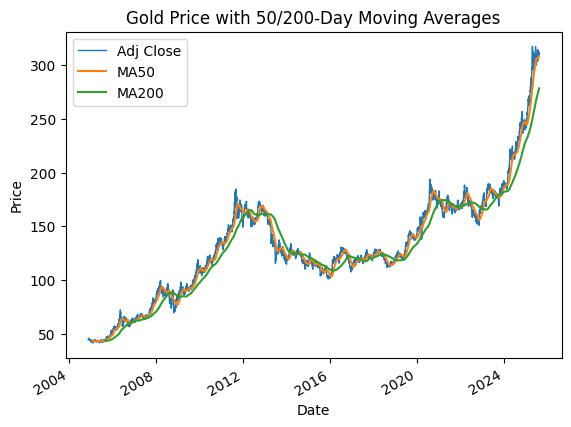

In [17]:
df['adj_close'].plot(linewidth=1, label='Adj Close')
df['adj_close'].rolling(50).mean().plot(label='MA50')
df['adj_close'].rolling(200).mean().plot(label='MA200')
plt.title("Gold Price with 50/200-Day Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_18616\4271010437.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df['adj_close'].resample('M').mean()


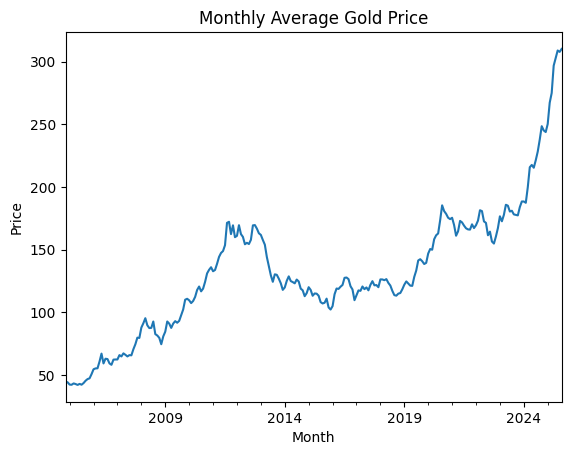

In [18]:
monthly_mean = df['adj_close'].resample('M').mean()
monthly_mean.plot()
plt.title("Monthly Average Gold Price")
plt.xlabel("Month"); plt.ylabel("Price")
plt.show()


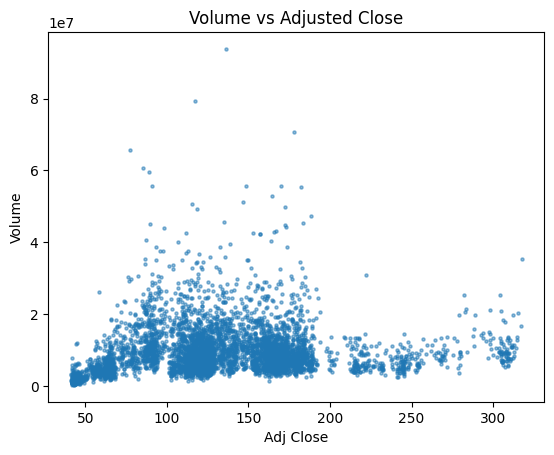

In [21]:
plt.scatter(df['adj_close'], df['volume'], s=5, alpha=0.5)
plt.title("Volume vs Adjusted Close")
plt.xlabel("Adj Close"); plt.ylabel("Volume")
plt.show()
